# Experiment 13

## Problem Statement:
Write complete code Using N'NIST dataset, Improve autoencoder's  performance using convolutional layers.

## GitHub & Google Colab Link: 

GitHub Link: https://github.com/piyush-gambhir/ncu-lab-manual-and-end-semester-projects/blob/main/NCU-CSL312%20-%20DL%20-%20Lab%20Manual/Experiment%2013/Experiment%2013.ipynb

Google Colab Link: 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/piyush-gambhir/ncu-lab-manual-and-end-semester-projects/blob/main/NCU-CSL312%20-%20DL%20-%20Lab%20Manual/Experiment%2013/Experiment%2013.ipynb)


## Installing Dependencies:

In [1]:
! pip install tabulate numpy pandas matplotlib seaborn

## Code

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 72s 86ms/step - loss: 0.3032 - val_loss: 0.1446
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 113ms/step - loss: 0.1405 - val_loss: 0.1270
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 113ms/step - loss: 0.1261 - val_loss: 0.1197
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 110ms/step - loss: 0.1189 - val_loss: 0.1146
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 91ms/step - loss: 0.1147 - val_loss: 0.1109
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 86ms/step - loss: 0.1116 - val_loss: 0.1086
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 105ms/step - loss: 0.1095 - val_loss: 0.1070
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 83ms/step - loss: 0.1079 - val_loss: 0.1056
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 53ms/step - loss: 0.1066 - val_loss: 0.1044
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - loss: 0.1055 - val_loss: 0.1036
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - loss: 0

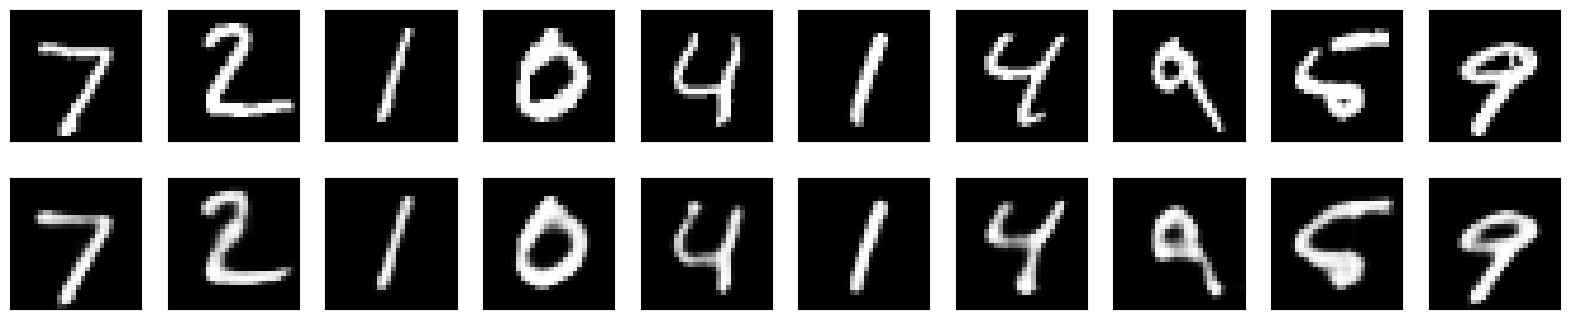

In [3]:

def build_conv_autoencoder():
    # Encoder
    input_img = layers.Input(shape=(28, 28, 1))  # 28x28 pixels with 1 channel
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)  # down to 4x4x8

    # Decoder
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(16, (3, 3), activation='relu')(x)  # no padding
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder

# Load MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Preprocessing
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

# Build and train the autoencoder
autoencoder = build_conv_autoencoder()
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode some digits (visualization)
decoded_imgs = autoencoder.predict(x_test)

# Display the results
n = 10  # number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
